In [16]:
import pandas as pd

# Load data
data = pd.read_csv("D:\\kaggle data\\2018-2019_Daily_Attendance_20240429.csv")

# Check and print column names
print(data.columns)

# Remove whitespace in column names (if necessary)
data.columns = data.columns.str.strip()

# Optionally convert all column names to lowercase
# data.columns = data.columns.str.lower()

# Verify again after adjustments
print(data.columns)

# Proceed if 'Status' exists
if 'Status' in data.columns:
    # Step 1: Data cleaning and preparation
    data['Date'] = pd.to_datetime(data['Date'])
    data['Status'] = data['Status'].replace({'Present': 1, 'Absent': 0, 'Late': 0.5})
else:
    print("Column 'Status' does not exist.")


Index(['School DBN', 'Date', 'Enrolled', 'Absent', 'Present', 'Released'], dtype='object')
Index(['School DBN', 'Date', 'Enrolled', 'Absent', 'Present', 'Released'], dtype='object')
Column 'Status' does not exist.


  School DBN      Date  Enrolled  Absent  Present  Released
0     01M015  20180905       172      19      153         0
1     01M015  20180906       171      17      154         0
2     01M015  20180907       172      14      158         0
3     01M015  20180912       173       7      166         0
4     01M015  20180913       173       9      164         0
Daily Attendance Rates:
                                 Date  AttendanceRate
0      1970-01-01 00:00:00.020180905       88.953488
1      1970-01-01 00:00:00.020180906       90.058480
2      1970-01-01 00:00:00.020180907       91.860465
3      1970-01-01 00:00:00.020180912       95.953757
4      1970-01-01 00:00:00.020180913       94.797688
...                              ...             ...
277148 1970-01-01 00:00:00.020190620       59.130435
277149 1970-01-01 00:00:00.020190621       56.637168
277150 1970-01-01 00:00:00.020190624       57.522124
277151 1970-01-01 00:00:00.020190625       56.194690
277152 1970-01-01 00:00:00.02019

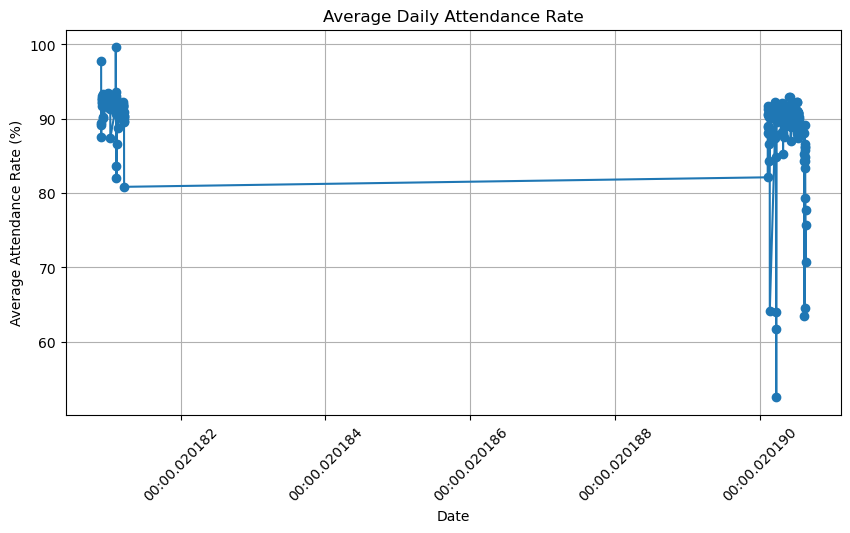

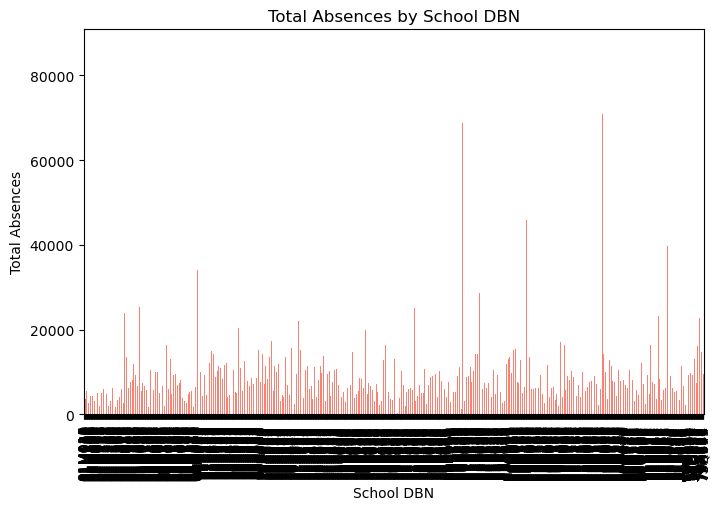

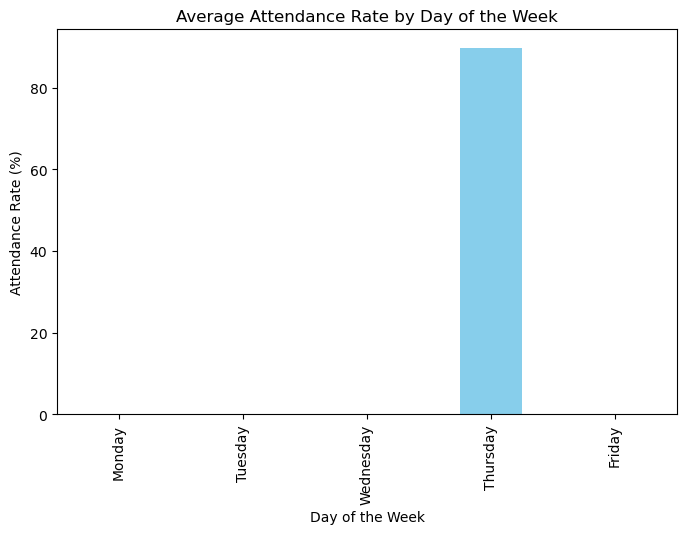

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv("D:\\kaggle data\\2018-2019_Daily_Attendance_20240429.csv")  # Update the path to your file

# Display the first few rows of data to inspect
print(data.head())

# Step 1: Data cleaning and preparation
data['Date'] = pd.to_datetime(data['Date'])  # Convert date column to datetime

# Step 2: Calculate attendance rate for each day
data['AttendanceRate'] = (data['Present'] / data['Enrolled']) * 100
print("Daily Attendance Rates:\n", data[['Date', 'AttendanceRate']])

# Step 3: Trend Analysis - Daily Attendance
daily_attendance = data.groupby('Date')['AttendanceRate'].mean()
plt.figure(figsize=(10, 5))
plt.plot(daily_attendance.index, daily_attendance.values, marker='o')
plt.title("Average Daily Attendance Rate")
plt.xlabel("Date")
plt.ylabel("Average Attendance Rate (%)")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Step 4: Absences by School DBN
absence_by_school = data.groupby('School DBN')['Absent'].sum()
plt.figure(figsize=(8, 5))
absence_by_school.plot(kind='bar', color='salmon')
plt.title("Total Absences by School DBN")
plt.xlabel("School DBN")
plt.ylabel("Total Absences")
plt.show()

# Step 5: Attendance by Day of the Week
data['DayOfWeek'] = data['Date'].dt.day_name()
attendance_by_day = data.groupby('DayOfWeek')['AttendanceRate'].mean()
attendance_by_day = attendance_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

plt.figure(figsize=(8, 5))
attendance_by_day.plot(kind='bar', color='skyblue')
plt.title("Average Attendance Rate by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Attendance Rate (%)")
plt.show()
